In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%pylab inline




%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
response = np.load('response_FD_NEW.npz')
A = response['arr1']
js = response['arr2']
hoft = response['arr3']
ct_l = response['arr4']
FD_correlations = np.load('correlations_FD.npz')
ft_A = FD_correlations['arr1']
corr_FD = FD_correlations['arr2']
wax = FD_correlations['arr3']  
a_damped = FD_correlations['arr5']
nt = 2000
tmax = 80
tax = np.linspace(0, tmax, nt)
dt = tax[1]-tax[0]

In [27]:

colorsx = ['sienna', 'seashell', 'chocolate', 'saddlebrown', 'sandybrown', 'peachpuff', 'peru', 'linen', 'bisque', 'darkorange', 'burlywood', 'antiquewhite', 'tan',
          'navajowhite', 'blanchedalmond', 'papayawhip', 'moccasin', 'orange', 'wheat', 'oldlace', 'darkgoldenrod', 'goldenrod', 'cornsilk', 'gold']
colorsr = ['pink', 'lightpink', 'palevioletred', 'rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'crimson',
           'sienna', 'chocolate', 'saddlebrown',]

color_index = np.linspace(0.3 - 0.175, 1.1, 51)
color_index[0] = 0.25
colors = [cm.Reds(index) for index in color_index]




Text(0.5, 0, 'time')

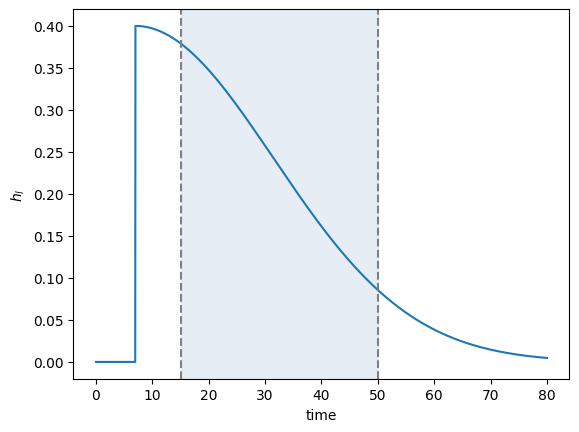

In [28]:
plt.plot(tax, ct_l)
plt.axvline(15, color = 'gray', ls='--')
plt.axvline(50, color = 'gray', ls='--')
plt.axvspan(15, 50, color='lightsteelblue', alpha=0.3)
plt.ylabel('$h_l$')
plt.xlabel('time')


Text(0.5, 0, '$\\omega$')

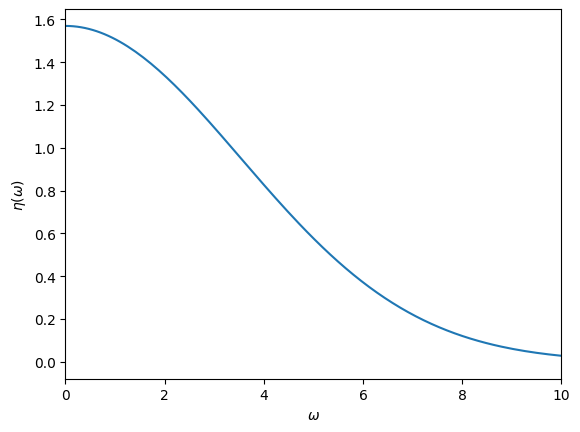

In [29]:
plt.plot(np.fft.fftshift(np.fft.fftfreq(len(tax),d=tax[1]-tax[0]) )*2*np.pi,np.fft.fftshift(np.abs(np.fft.fft(hoft[3])))**2)
plt.xlim(0,10)
plt.ylabel('$\\eta(\\omega)$')
plt.xlabel('$\\omega$')

Text(0.5, 0, 'time')

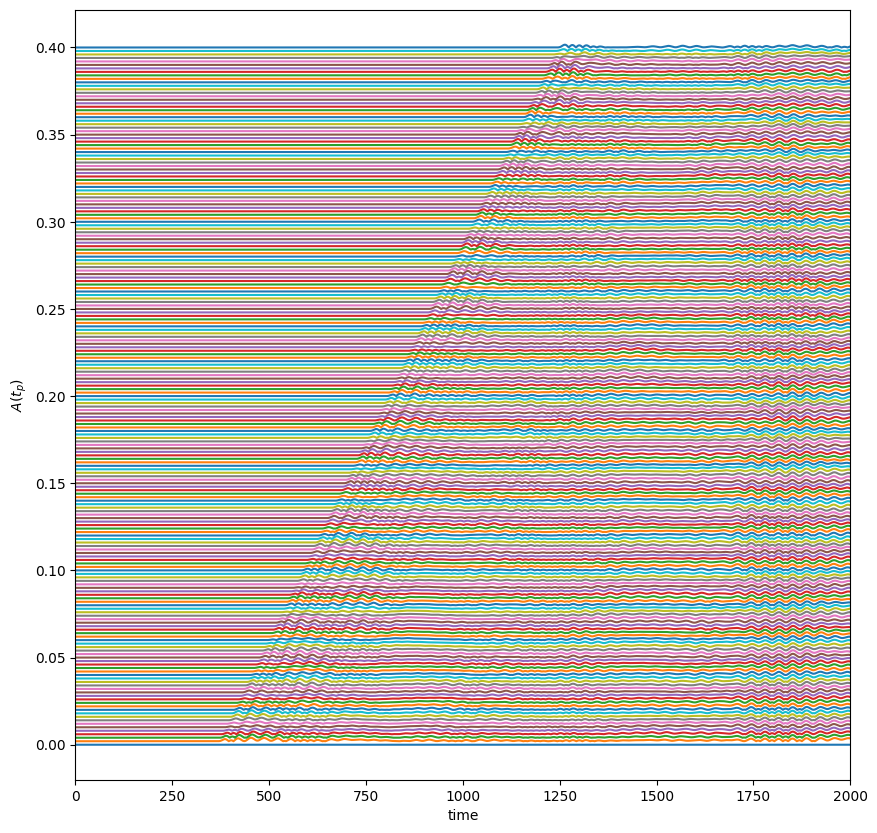

In [30]:
plt.figure(figsize=(10,10))
for j in range(len(js)):    
    plt.plot(np.abs(A[0,j,:]-A[0,0,:])+0.002*j)

plt.xlim(0,2000)
plt.ylabel('$A(t_p)$')
plt.xlabel('time')


Text(0.5, 0, 'time')

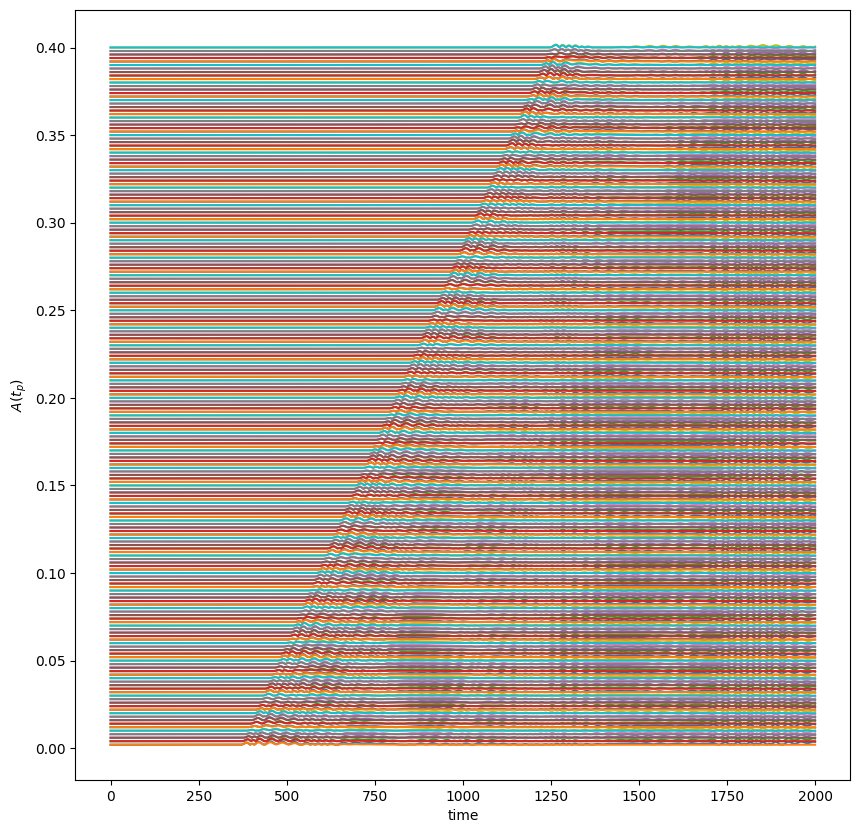

In [31]:
plt.figure(figsize=(10,10))
for j in range(1,len(js)):    
    plt.plot(np.abs(A[0,j,:]-A[0,0,:])+0.002*j)

    plt.plot(np.abs(a_damped[0,j,:])+0.002*j)
    #plt.plot(np.abs(A[0,j,:]-A[0,0,:])+0.2*j)
#plt.xlim(0,2000)
#plt.ylim(0,0.0008)
plt.ylabel('$A(t_p)$')
plt.xlabel('time')

Text(0.5, 0, '$\\omega$')

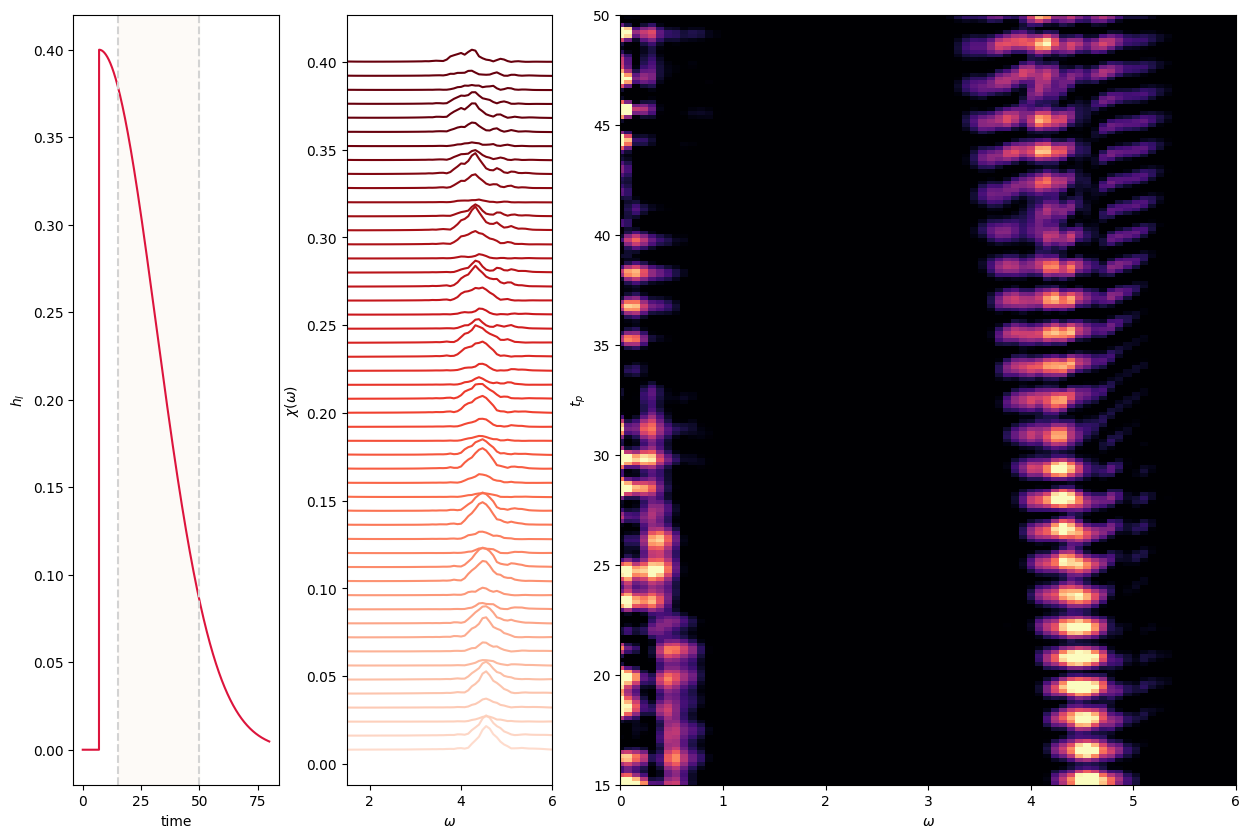

In [ ]:
import matplotlib.cm as cmap

fig, ax = plt.subplots(1,3, figsize=(15,10), gridspec_kw={'width_ratios': [1,1, 3]})
fd_spect = np.abs(corr_FD[0,1:,:])**2
c = ax[2].pcolorfast(wax, js[1:], fd_spect, cmap=cmap.magma, vmin = 1e-3, vmax = 1e-2)
#fig.colorbar(c)
index=0

ax[0].plot(tax, ct_l, color = 'crimson')
ax[0].axvline(15, color = 'lightgray', ls='--')
ax[0].axvline(50, color = 'lightgray', ls='--')
ax[0].axvspan(15, 50, color='lavenderblush', alpha=0.3)
ax[0].set_ylabel('$h_l$')
ax[0].set_xlabel('time')

for j in range(1,100,2):   
    index += 1
    ax[1].plot(wax, np.abs(corr_FD[0,j,:])**2+0.008*index, color = colors[index])

ax[1].set_xlim(1.5,6)
ax[1].set_ylabel('$\\chi(\\omega)$')
ax[1].set_xlabel('$\\omega$')
ax[2].set_xlim(0,6)
#plt.ylim(bottom=15)#50)


#c = ax.imshow(fd_spect[::-1,::-1], cmap=cmap.magma, vmin = 1e-3, vmax = 1e-2)
#plt.xlim(1000,1075)

ax[2].set_ylabel('$t_p$')

plt.xlabel('$\\omega$')

Text(0.5, 0, 'time')

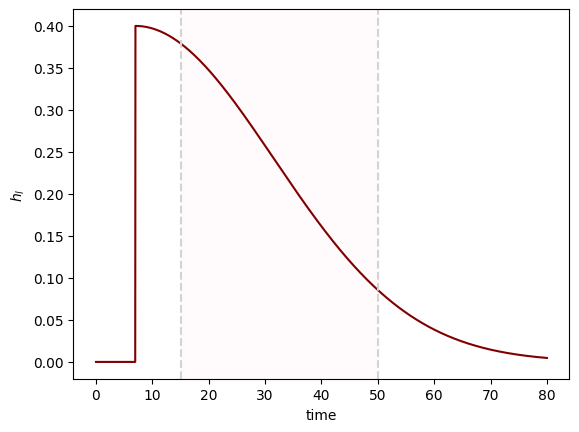

In [44]:
plt.plot(tax, ct_l, color = 'maroon')
plt.axvline(15, color = 'lightgray', ls='--')
plt.axvline(50, color = 'lightgray', ls='--')
plt.axvspan(15, 50, color='lavenderblush', alpha=0.3)
plt.ylabel('$h_l$')
plt.xlabel('time')

Text(0, 0.5, '$\\chi(t_p, \\omega=4)$')

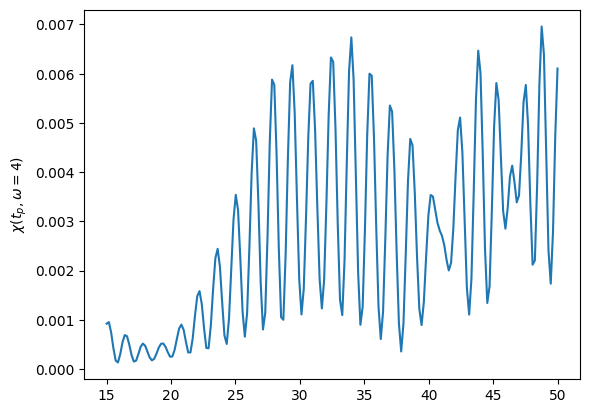

In [78]:
tp = js[1:]
w0 = 1051
plt.plot(tp, np.abs(corr_FD[0,1:,w0])**2)
plt.ylabel('$\\chi(t_p, \\omega=4)$')

In [59]:
tp = tp+15
print(tp)
ntp = len(tp)
dtp = tp[1]-tp[0]

[30.         30.35353535 30.70707071 31.06060606 31.41414141 31.76767677
 32.12121212 32.47474747 32.82828283 33.18181818 33.53535354 33.88888889
 34.24242424 34.5959596  34.94949495 35.3030303  35.65656566 36.01010101
 36.36363636 36.71717172 37.07070707 37.42424242 37.77777778 38.13131313
 38.48484848 38.83838384 39.19191919 39.54545455 39.8989899  40.25252525
 40.60606061 40.95959596 41.31313131 41.66666667 42.02020202 42.37373737
 42.72727273 43.08080808 43.43434343 43.78787879 44.14141414 44.49494949
 44.84848485 45.2020202  45.55555556 45.90909091 46.26262626 46.61616162
 46.96969697 47.32323232 47.67676768 48.03030303 48.38383838 48.73737374
 49.09090909 49.44444444 49.7979798  50.15151515 50.50505051 50.85858586
 51.21212121 51.56565657 51.91919192 52.27272727 52.62626263 52.97979798
 53.33333333 53.68686869 54.04040404 54.39393939 54.74747475 55.1010101
 55.45454545 55.80808081 56.16161616 56.51515152 56.86868687 57.22222222
 57.57575758 57.92929293 58.28282828 58.63636364 58.

(0.0, 5.0)

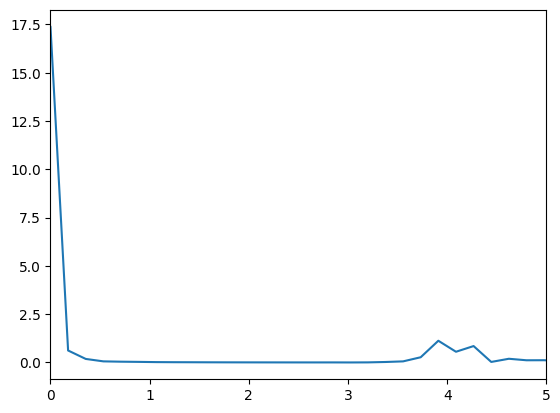

In [ ]:
wax_tp=np.fft.fftshift(np.fft.fftfreq(len(tp),d=dtp))*2*pi
y = np.fft.fftshift(np.fft.fft(corr_FD[0,1:,w0]))
plt.plot(wax_tp,np.abs(y)**2)
plt.xlim(0,5)